# Ames house prices kaggle competition

This is data analysis prepared for Kaggle [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques#) competition analysing and predicting prices of residential homes in [Ames, Iowa](https://en.wikipedia.org/wiki/Ames,_Iowa).

The main steps of the analysis process we will conduct are:
1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data
4. Prepare the data for machine learning algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present solution


## 1. Frame the problem and look at the big picture

This competition objective is to predict the sales price of each home base on the set of features values. For Id in the test set, we must predict the value of the `SalePrice` variable.

This is clearly supervised learning problem since we are dealing with labeled training data. And because we try to predict variable value based on other set of feature it is clearly a regression problem.

The proposed solution will be evaluated on Root-Mean-Squared-Error (RMSE) the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

The final submission should have the following format:

`Id,SalePrice
1461,169000.1
1462,187724.1233
1463,175221
etc.`


## 2. Get the data

We will be using The Ames Housing dataset which was compiled by Dean De Cock for use in data science education. It contains 79 explanatory variables describing aspects of residential homes in Ames, Iowa, USA.

The data set was downloaded from Kaggle competition site and saved in this analysis `datasets` folder. Data is already divided into test and train data sets. We will use train data set to build our model and test to evaluate it later on.

First let's have a quick look at data set description where we can find all variables exmplanation to better understand what each variable means.

In [175]:
!cat datasets/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

We see all feature described fully here. We can see that there are several features for which `NA` does not mean that the data was not callected but rather lack of presence (e.g. `NA` in `PoolQC` variable means that there is no pool at the property which is a valuable information rather than just missing data). There are also properties represented by several columns if there are multiple types of values needed for one property (e.g. `Exterior1st` and `Exterior2nd` both represent exterior covering on house but the second is not empty only if more than one material is used in the property). We talk here about categorical features. We will take of these problems later.

Let's now load the data and have a close look at it.

In [302]:
import pandas as pd

housing_train = pd.read_csv("datasets/train.csv")
housing_test = pd.read_csv("datasets/train.csv")

We'll first see first few data records to check how it looks like.

In [177]:
housing_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see that data set contains large number of features for each data record. The last one is `SalePrice` which is our target value - the one we will try to predict.

Next let's get more overall data set information.

In [178]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see that we have lot's of feature here! Around half of them are of `object` type and since we loaded them from csv file we assume they are text. This means that we will deal with lots of categorical data features. Of course features like `Street` has to be treated as category rather than a number value. On the other hand all area related fields will be numerical. We will have to take care of the categorical values before feeding them into machine learning algorithms.

What is also clear here is that we have 1460 data records in our training set. Not that much in terms of training data model, but probably enough because of reach features number. Some of the features however have less (sometimes much less) values recorded which means we will also deal with missing values here. There are several strategies to deal with that based on the models solution we will arrive at and we will deal with this problem also before feeding the data to out models. Doing that we also need to remember about what we found studying data decription - some missing values are actually meaningful (again: some of them not all). Like in case of `PoolQC` variable: among all 1460 properties only 7 had swimming pools and the rest with `NaN` simply did not. Definitelly not a pool area.

Let's now see the overall numerical features distribution properties.

In [179]:
housing_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Here we can see the numerical features only. It is still plenty of them describing each data record. All right almost each: `LotFrontage`, `MasVnrArea`, `GarageYrBlt` have some missing data but besides that the numerical variables are collected rather fully which makes our analysis promising. 

## 3. Explore the data

Taking into account our data complexity - especially features number - we will not be able to predict anything manually. Or at least it will be difficult. But we can perform some basic exploratory analysis to see how the data behaves in general sense, what are main tendencies or what are the relations between variables espcially with the relation to our target value. Let's do it now.

Let's start by creating the training data copy for exploration to prevent any accidental data modifications.

In [180]:
housing_train_copy = housing_train.copy()

First we will look at numerical variables distributions.

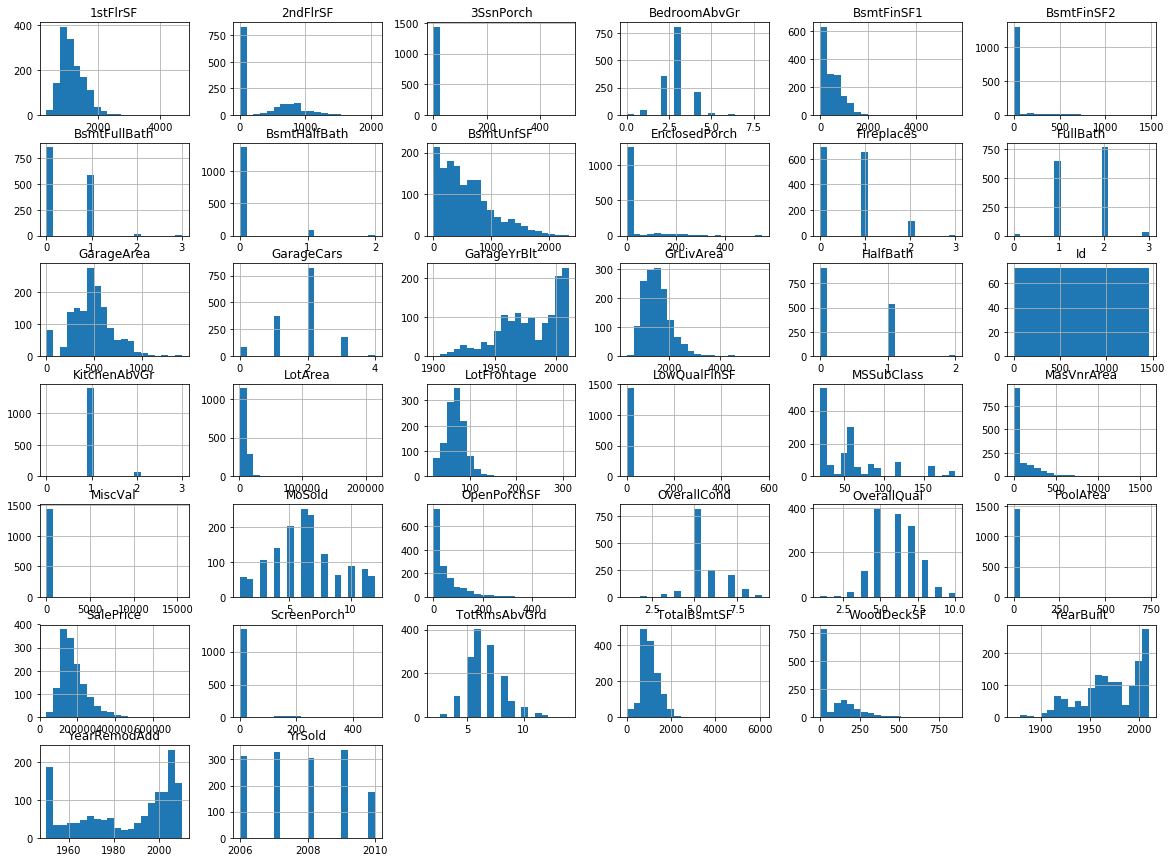

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt

housing_train_copy.hist(bins=20, figsize=(20, 15))
plt.show()

We have now very general sense of what each numerical variable distribution looks like. Let's have a closer look at some of them. 

We will start with target feature `SalePrice` - our target value.

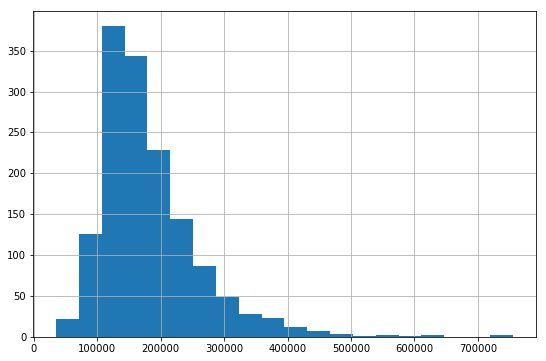

In [182]:
housing_train_copy["SalePrice"].hist(bins=20, figsize=(9, 6))

We can clearly see that the `SalePrice` variable has positively skewed distribution meaning that there is a lot of cheaper properties and a few expesive ones. Let's look more closely at `SalePrice` distribution properties.

In [183]:
housing_train_copy["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

So for our target value with have obviously 1460 data records - one for each transaction recorded in the data set. The mean price of properties sold was \$180921 with a standard deviation of \$79442. Since distribution is skewed median will be central tendecy mesure, with a value of \$163000. We have quite long positive tail in the distribution - the maximum value is \$755000. This is large above the average. Positive thing we can recognize here is the fact that data prices were not capped at some upper price which will make it easier to use such "raw" labels for our model purpose. 

We could also discard labels with values above some threshold (e.g. \$340000) level when training our model since most of data sits in two standard deviations from the mean range (\$180921 + \$158884).


Next, let's look at correlations between numerical feature variables. Since we have 38 numerical features we would end up with 38x38 correlation matrix. That is to large to comprehend. Instead let's check how each numerical variable correlates with our target value `SalePrice` with correlations in descending order.

In [184]:
corr_matrix = housing_train_copy.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We found out that there is quite a few features with large positive correlations with SalePrice target variable: OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF ,1stFlrSF, FullBath, TotRmsAbvGrd,YearBuilt, YearRemodAdd, GarageYrBlt, MasVnrArea, Fireplaces. So the bigger overall quality the bigger the selling price, the bigger above ground living area the bigger the selling price and so on. 

Let's see correlation plots for these variables.

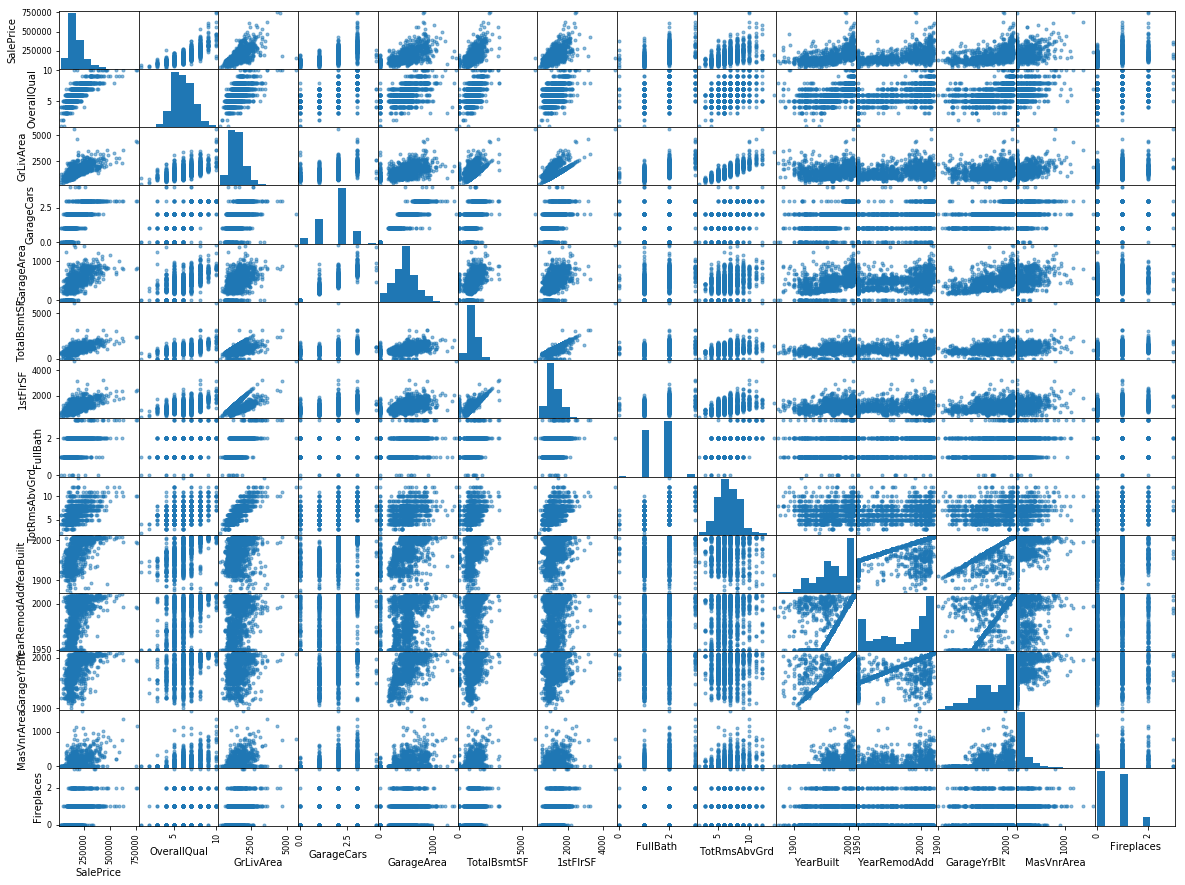

In [185]:
from pandas.tools.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF" , 
              "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", 
              "GarageYrBlt", "MasVnrArea", "Fireplaces"]

scatter_matrix(housing_train_copy[attributes], figsize=(20, 15));

First row shows the correlations we calculated above between `SalePrice` target value and other most correlated numerical features. 

The most promising attribute to predict the median house value is the `OverallQual`, so let’s zoom in on their correlation scatterplot.

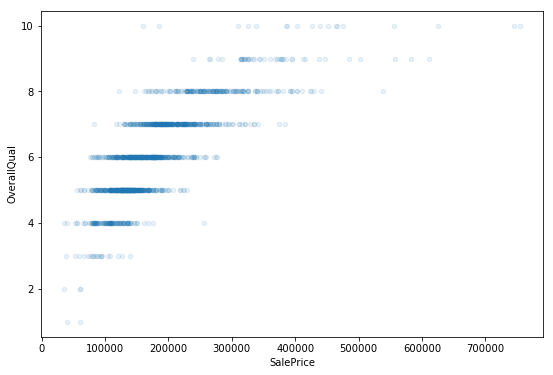

In [186]:
housing_train_copy.plot(kind="scatter", x="SalePrice", y="OverallQual", alpha=0.1, figsize=(9, 6))

It is quite obvious that the better state the property is the higher price it will get. `OverallQual` is discrete values numerical variable ranging in scale from 1 (very poor condidion) to 10 (very excellent). This seems to be our main prediction value.

Other interesting thing we can recognize from the correlations grid plot is large correlation between other non-label variables. There are some obvious ones like between `YearBuilt` and `GarageYrBlt` variables.

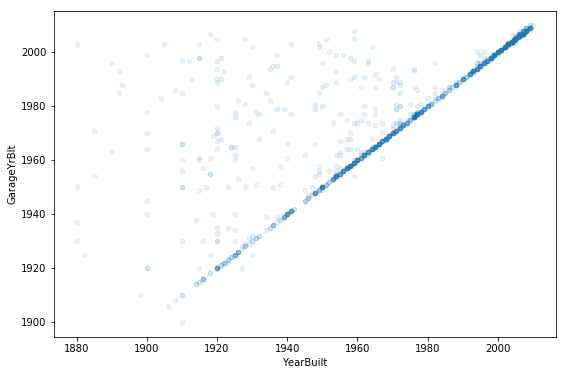

In [187]:
housing_train_copy.plot(kind="scatter", x="YearBuilt", y="GarageYrBlt", alpha=0.1, figsize=(9, 6))

It quite obvious that most of the houses have garages built at the same time. Not all but most.

There are also less obious but logical correlations like between `TotalBsmtSF` and `1stFlrSF`.

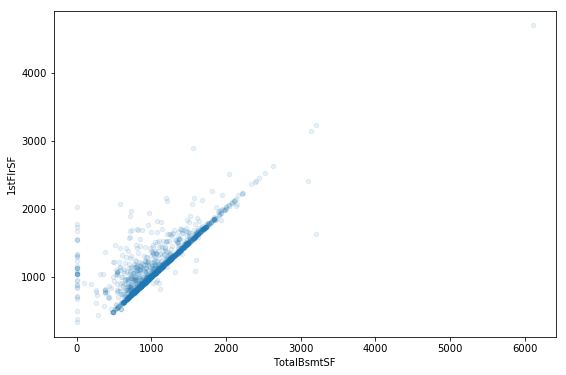

In [188]:
housing_train_copy.plot(kind="scatter", x="TotalBsmtSF", y="1stFlrSF", alpha=0.1, figsize=(9, 6))

When you thinkg about it, when house has no basement there is not correlation. But when it has, for simple architectural reasons the area of basement should quite the same like area of first floor right above it. So we could say that `TotalBsmtSF` redundant for the model: it tells nothing new besides the fact that there is or the is no basement at the property, which is meaningful and could be used as separate feature.

## 4. Prepare the data

It is time to prepare our training data set to feed into machine learning algorithms.

Let’s revert to a clean training set and let’s separate the predictors and the labels since we don’t want to apply the same transformations to the predictors and the target values.

__For now we will concentrate on building the model using only numerical attributes. We will use also categorical attributes later in this analysis future interations.__  

In [257]:
housing_train_prepared = housing_train.drop("SalePrice", axis=1)
housing_train_prepared = housing_train_prepared._get_numeric_data()    # remove this to use also categorical data

housing_train_labels = housing_train["SalePrice"].copy()

In [258]:
housing_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

First of all we need to get rid of `Id` variable which is not valuable for machine learning modelling purposes.

In [259]:
housing_train_prepared = housing_train_prepared.drop("Id", axis=1)

Next, in case of three attributes we deal with missing values `LotFrontage`, `MasVnrArea`, `GarageYrBlt`. Let's start with `GarageYrBlt`. It seems that `NaN` values here simply correspond with no garage built at the property.

In [260]:
housing_copy[["GarageYrBlt", "GarageType"]][housing_copy["GarageYrBlt"].isnull()].head()

,GarageYrBlt,GarageType
39,NaN,NaN
48,NaN,NaN
78,NaN,NaN
88,NaN,NaN
89,NaN,NaN


So we will solve the problem with either throing away these 81 cases with no garage, but this way we would discard one class of houses: properties without garages could have lower price which is very informative for our model. That is why we decide to fill all `Nan` values in this attribute with 0 meaning that no garage was built.

In [261]:
housing_train_prepared["GarageYrBlt"] = housing_train_prepared["GarageYrBlt"].fillna(0)

The other two variables `LotFrontage`, `MasVnrArea` missing values are measurements of linear feet of street connected to property and masonry veneer area in square feet. We miss these measurements so we will fill them with median value for these variables.

In [262]:
median_lot_frontage = housing_train_prepared["LotFrontage"].median()
housing_train_prepared["LotFrontage"] = housing_train_prepared["LotFrontage"].fillna(median_lot_frontage)    

In [263]:
median_mas_vnr_area = housing_train_prepared["MasVnrArea"].median()
housing_train_prepared["MasVnrArea"] = housing_train_prepared["MasVnrArea"].fillna(median_mas_vnr_area)    

In [264]:
housing_train_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
G

So we solved missing values problem. The last thing that we need to do is to standardize the values of different attributes.

In [265]:
housing_train_prepared.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
LotFrontage,1460.0,69.863699,22.027677,21.0,60.0,69.0,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.0,6.0,7.0,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.0,5.0,6.0,9.0


If we analyze the `min` and `max` value for different variables we see that they are in different units and ranges. We want all of them be concentrated around mean equal to 0 and standard deviation equal to 1. 

In [266]:
from scipy.stats import zscore
housing_train_prepared = housing_train_prepared.apply(zscore)

In [267]:
housing_train_prepared.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,-1.504124e-16,1.000343,-0.872563,-0.872563,-0.163109,0.309859,3.147673
LotFrontage,1460.0,2.801602e-16,1.000343,-2.219047,-0.447940,-0.039223,0.414907,11.041546
LotArea,1460.0,-4.202783e-17,1.000343,-0.923729,-0.296991,-0.104063,0.108708,20.518273
OverallQual,1460.0,-7.680310e-17,1.000343,-3.688413,-0.795151,-0.071836,0.651479,2.821425
OverallCond,1460.0,3.692632e-16,1.000343,-4.112970,-0.517200,-0.517200,0.381743,3.078570


After this transformation our data is standardized with mean equal 0 and standard deviation equal 1 for all variables. We are ready to feed our train data set to machine learning models!

## 5. Short-list promising models

We are now ready to select and train a machine learning model.

Let's first train a Linear Regression model.

In [268]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train_prepared, housing_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let’s measure this regression model’s RMSE. To measure model performance we will use cross-validation: use part of the training set for training, and part for model validation.

We will use Scikit-Learn’s cross-validation feature. The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores. Thanks to that we will avoid the risk of overfitting the training data.

In [269]:
lin_scores = cross_val_score(lin_reg, housing_train_prepared, housing_train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [270]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [271]:
display_scores(lin_rmse_scores)

Scores: [ 27070.00255497  29571.99141092  26574.52768741  41301.30489355
  39533.83492753  31159.59045665  30055.07993989  30171.57320582
  63147.60817853  29192.19684871]
Mean: 34777.7710104
Standard deviation: 10543.4248443


This is clearly not a great score: most properties price ranges between \$100,000 and \$250,000, so a typical prediction error of \$34,777 is not satisfying. Altough not bad as for the first try.

Let’s try a more complex model. DecisionTreeRegressor is a powerful model, capable of finding nonlinear relationships in the data.

In [272]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_train_prepared, housing_train_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Now that the model is trained, let’s evaluate it on the training set again using cross-validation.

In [273]:
tree_scores = cross_val_score(tree_reg, housing_train_prepared, housing_train_labels,
                              scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [ 35073.39799991  37558.9269161   36795.9995916   44617.02370564
  37609.49304137  33382.22413304  37088.04193698  33812.15915271
  56830.88113303  38272.91614264]
Mean: 39104.1063753
Standard deviation: 6605.49961121


The Decision Tree model is overfitting training data so much that it performs worse than the Linear Regression model (RMSE 34777 vs. 39104).

Let’s try another more complex model: the RandomForestRegressor. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. Let's see it in action.

In [275]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=31)
forest_reg.fit(housing_train_prepared, housing_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=31,
           verbose=0, warm_start=False)

In [276]:
forest_scores = cross_val_score(forest_reg, housing_train_prepared, housing_train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 29027.82996235  29799.50518169  25482.0946702   40229.6218988
  36355.14005442  26101.51020933  25566.96294701  27361.14888517
  42431.62131304  27966.39312947]
Mean: 31032.1828251
Standard deviation: 5968.83638177


Using Random Forest model we achieved RMSE value of 31032 vs. 34777 in case of Linear Regression model. That is better! 

## 6. Fine-tune models

So far we have built three proming models. Random forest model turned out tu perform best. Let’s try to tune this model parameters.

Let's use GridSearchCV to search for optimal parameters.

In [284]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [1, 3, 10, 30, 100, 300], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error")

grid_search.fit(housing_train_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [1, 3, 10, 30, 100, 300, 1000], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

Let's get best combination of parameters.

In [289]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 100}

And the final estimator.

In [293]:
final_forest_reg = grid_search.best_estimator_

Let's check its RMSE using cross-validation on training set.

In [294]:
final_forest_scores = cross_val_score(final_forest_reg, housing_train_prepared, housing_train_labels,
                                      scoring="neg_mean_squared_error", cv=10)
final_forest_rmse_scores = np.sqrt(-final_forest_scores)
display_scores(final_forest_rmse_scores)

Scores: [ 24021.75280899  27371.57789425  24175.77831137  41905.71883363
  32767.13884904  26044.06177345  22990.11298024  23632.2368906
  38553.54432174  24905.81963273]
Mean: 28636.7742296
Standard deviation: 6417.46926945


The RMSE score for this combination is 28636, which is slightly better than the score we got earlier using the default random forest hyperparameter values (which was 31032).

We have successfully fine-tuned our model!

The RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions - let's look at it.

In [297]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = list(housing_train_prepared)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.21771563388232049, 'OverallQual'),
 (0.12494030940002693, 'GrLivArea'),
 (0.1036509778097099, 'GarageCars'),
 (0.08643687551031895, 'TotalBsmtSF'),
 (0.068575895627726646, 'YearBuilt'),
 (0.051736180070776953, '1stFlrSF'),
 (0.043191925835652442, 'GarageArea'),
 (0.032323344762887382, '2ndFlrSF'),
 (0.030919312367990549, 'LotArea'),
 (0.029425824730989467, 'BsmtFinSF1'),
 (0.027197780335419166, 'FullBath'),
 (0.026616466157634789, 'GarageYrBlt'),
 (0.019462521253152825, 'TotRmsAbvGrd'),
 (0.017712249524300155, 'YearRemodAdd'),
 (0.017256811089732572, 'Fireplaces'),
 (0.015270532885758492, 'MasVnrArea'),
 (0.01206379380559045, 'OpenPorchSF'),
 (0.011733514782877374, 'LotFrontage'),
 (0.0097941504695047126, 'BsmtUnfSF'),
 (0.0065321038279417178, 'MSSubClass'),
 (0.0064930945168488385, 'OverallCond'),
 (0.0063821838394464946, 'BedroomAbvGr'),
 (0.0060890807537842036, 'WoodDeckSF'),
 (0.0053193846163216195, 'MoSold'),
 (0.005159385648621795, 'HalfBath'),
 (0.0041379774752965722, 'BsmtF

Let's recall our correlation matrix we saw earlier. Features important for random forest model are mostly these which we found being highly and positively correlated with our target feature `SalePrice`. This suggests that we could try dropping these atributes with correlation closer to 0. 

What we could to improve our model is getting rid of uninformative features which would clear up some real existing dependiencies. We could we could also use categorical data, create extra features and clear data outliers and.

Now - after choosing our final model and fine-tuning it - let's evaluate the it on the test set.

To do it we first need to apply all the transformation we applied to our training set.

In [ ]:
final_forest_reg